# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [1]:
!pip install pymongo

     |████████████████████████████████| 508 kB 9.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [2]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 7.7 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install tweepy

     |████████████████████████████████| 147 kB 19.2 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install twitter

     |████████████████████████████████| 54 kB 516 kB/s eta 0:00:011
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [6]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [7]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secrete']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secrete']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [8]:
client = MongoClient(mongod_connect)
db = client.gp31 # use or create a database named demo
tweet_collection = db.tweet_collection #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [9]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [10]:
track = ['election'] # define the keywords, tweets contain election

locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [11]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1326239880490442761
1326239880507256832
1326239880498778113
1326239880549109761
1326239880653938688
1326239880649838592
1326239880612024321
1326239880784080896
1326239880695836672
1326239880695980039
1326239880863764481
1326239880897302529
1326239880943448072
1326239880884723719
1326239880947539968
1326239880897327104
1326239881010483202
1326239880956026881
1326239881077657606
1326239881006297088
1326239881148981250
1326239881228673031
1326239881245417473
1326239881207697408
1326239881216077830
1326239881190731776
1326239881140596736
1326239881258029061
1326239881358692352
1326239881501274113
1326239881454972928
1326239881706803207
1326239881635508225
1326239881773846528
1326239881648099328
1326239881765531650
1326239881719320576
1326239881643909122
1326239881996218369
1326239882050752513
1326239882189090818
1326239882163924995
1326239882268856320
1326239882319077381
1326239882252005378
1326239882331779072
1326239882356776960
1326239882348466179
1326239882403082242
1326239882528792576


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [12]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [13]:
count = 100 #number of returned tweets, default and max is 100
geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "election"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [14]:
search_results = rest_api.search.tweets( count=count,q=q, geocode=geocode) 
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Tue Nov 10 19:07:55 +0000 2020'
'Tue Nov 10 19:07:52 +0000 2020'
'Tue Nov 10 19:07:48 +0000 2020'
'Tue Nov 10 19:07:43 +0000 2020'
'Tue Nov 10 19:07:40 +0000 2020'
'Tue Nov 10 19:07:34 +0000 2020'
'Tue Nov 10 19:07:27 +0000 2020'
'Tue Nov 10 19:07:26 +0000 2020'
'Tue Nov 10 19:07:19 +0000 2020'
'Tue Nov 10 19:07:16 +0000 2020'
'Tue Nov 10 19:07:15 +0000 2020'
'Tue Nov 10 19:07:11 +0000 2020'
'Tue Nov 10 19:07:09 +0000 2020'
'Tue Nov 10 19:07:09 +0000 2020'
'Tue Nov 10 19:07:06 +0000 2020'
'Tue Nov 10 19:07:02 +0000 2020'
'Tue Nov 10 19:06:59 +0000 2020'
'Tue Nov 10 19:06:57 +0000 2020'
'Tue Nov 10 19:06:53 +0000 2020'
'Tue Nov 10 19:06:45 +0000 2020'
'Tue Nov 10 19:06:40 +0000 2020'
'Tue Nov 10 19:06:37 +0000 2020'
'Tue Nov 10 19:06:37 +0000 2020'
'Tue Nov 10 19:06:36 +0000 2020'
'Tue Nov 10 19:06:32 +0000 2020'
'Tue Nov 10 19:06:30 +0000 2020'
'Tue Nov 10 19:06:24 +0000 2020'
'Tue Nov 10 19:06:24 +0000 2020'
'Tue Nov 10 19:06:19 +0000 2020'
'Tue Nov 10 19:06:18 +0000 2020'
'Tue Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [15]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        geocode=geocode, max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Tue Nov 10 19:03:48 +0000 2020'
'Tue Nov 10 19:03:39 +0000 2020'
'Tue Nov 10 19:03:34 +0000 2020'
'Tue Nov 10 19:03:32 +0000 2020'
'Tue Nov 10 19:03:28 +0000 2020'
'Tue Nov 10 19:03:27 +0000 2020'
'Tue Nov 10 19:03:26 +0000 2020'
'Tue Nov 10 19:03:25 +0000 2020'
'Tue Nov 10 19:03:24 +0000 2020'
'Tue Nov 10 19:03:23 +0000 2020'
'Tue Nov 10 19:03:20 +0000 2020'
'Tue Nov 10 19:03:19 +0000 2020'
'Tue Nov 10 19:03:07 +0000 2020'
'Tue Nov 10 19:03:05 +0000 2020'
'Tue Nov 10 19:03:02 +0000 2020'
'Tue Nov 10 19:03:01 +0000 2020'
'Tue Nov 10 19:03:01 +0000 2020'
'Tue Nov 10 19:02:51 +0000 2020'
'Tue Nov 10 19:02:50 +0000 2020'
'Tue Nov 10 19:02:50 +0000 2020'
'Tue Nov 10 19:02:50 +0000 2020'
'Tue Nov 10 19:02:46 +0000 2020'
'Tue Nov 10 19:02:43 +0000 2020'
'Tue Nov 10 19:02:43 +0000 2020'
'Tue Nov 10 19:02:41 +0000 2020'
'Tue Nov 10 19:02:37 +0000 2020'
'Tue Nov 10 19:02:32 +0000 2020'
'Tue Nov 10 19:02:29 +0000 2020'
'Tue Nov 10 19:02:27 +0000 2020'
'Tue Nov 10 19:02:25 +0000 2020'
'Tue Nov 1

'Tue Nov 10 18:15:51 +0000 2020'
'Tue Nov 10 18:15:45 +0000 2020'
'Tue Nov 10 18:15:45 +0000 2020'
'Tue Nov 10 18:15:43 +0000 2020'
'Tue Nov 10 18:15:29 +0000 2020'
'Tue Nov 10 18:15:29 +0000 2020'
'Tue Nov 10 18:15:06 +0000 2020'
'Tue Nov 10 18:15:05 +0000 2020'
'Tue Nov 10 18:14:53 +0000 2020'
'Tue Nov 10 18:14:44 +0000 2020'
'Tue Nov 10 18:14:39 +0000 2020'
'Tue Nov 10 18:14:35 +0000 2020'
'Tue Nov 10 18:14:35 +0000 2020'
'Tue Nov 10 18:14:30 +0000 2020'
'Tue Nov 10 18:14:19 +0000 2020'
'Tue Nov 10 18:13:04 +0000 2020'
'Tue Nov 10 18:13:00 +0000 2020'
'Tue Nov 10 18:12:59 +0000 2020'
'Tue Nov 10 18:12:45 +0000 2020'
'Tue Nov 10 18:12:40 +0000 2020'
'Tue Nov 10 18:12:38 +0000 2020'
'Tue Nov 10 18:12:20 +0000 2020'
'Tue Nov 10 18:11:59 +0000 2020'
'Tue Nov 10 18:11:37 +0000 2020'
'Tue Nov 10 18:11:33 +0000 2020'
'Tue Nov 10 18:11:16 +0000 2020'
'Tue Nov 10 18:11:14 +0000 2020'
'Tue Nov 10 18:11:04 +0000 2020'
'Tue Nov 10 18:10:55 +0000 2020'
'Tue Nov 10 18:10:51 +0000 2020'
'Tue Nov 1

'Tue Nov 10 17:32:00 +0000 2020'
'Tue Nov 10 17:31:56 +0000 2020'
'Tue Nov 10 17:31:53 +0000 2020'
'Tue Nov 10 17:31:44 +0000 2020'
'Tue Nov 10 17:31:43 +0000 2020'
'Tue Nov 10 17:31:42 +0000 2020'
'Tue Nov 10 17:31:33 +0000 2020'
'Tue Nov 10 17:31:31 +0000 2020'
'Tue Nov 10 17:31:31 +0000 2020'
'Tue Nov 10 17:31:30 +0000 2020'
'Tue Nov 10 17:31:28 +0000 2020'
'Tue Nov 10 17:31:17 +0000 2020'
'Tue Nov 10 17:31:17 +0000 2020'
'Tue Nov 10 17:30:59 +0000 2020'
'Tue Nov 10 17:30:50 +0000 2020'
'Tue Nov 10 17:30:43 +0000 2020'
'Tue Nov 10 17:30:42 +0000 2020'
'Tue Nov 10 17:30:26 +0000 2020'
'Tue Nov 10 17:30:10 +0000 2020'
'Tue Nov 10 17:30:10 +0000 2020'
'Tue Nov 10 17:29:53 +0000 2020'
'Tue Nov 10 17:29:41 +0000 2020'
'Tue Nov 10 17:29:37 +0000 2020'
'Tue Nov 10 17:29:33 +0000 2020'
'Tue Nov 10 17:29:29 +0000 2020'
'Tue Nov 10 17:29:28 +0000 2020'
'Tue Nov 10 17:28:54 +0000 2020'
'Tue Nov 10 17:28:39 +0000 2020'
'Tue Nov 10 17:28:34 +0000 2020'
'Tue Nov 10 17:28:25 +0000 2020'
'Tue Nov 1

'Tue Nov 10 16:54:24 +0000 2020'
'Tue Nov 10 16:54:21 +0000 2020'
'Tue Nov 10 16:54:11 +0000 2020'
'Tue Nov 10 16:53:57 +0000 2020'
'Tue Nov 10 16:53:54 +0000 2020'
'Tue Nov 10 16:53:48 +0000 2020'
'Tue Nov 10 16:53:48 +0000 2020'
'Tue Nov 10 16:53:32 +0000 2020'
'Tue Nov 10 16:53:30 +0000 2020'
'Tue Nov 10 16:53:19 +0000 2020'
'Tue Nov 10 16:53:12 +0000 2020'
'Tue Nov 10 16:53:04 +0000 2020'
'Tue Nov 10 16:53:03 +0000 2020'
'Tue Nov 10 16:53:01 +0000 2020'
'Tue Nov 10 16:52:56 +0000 2020'
'Tue Nov 10 16:52:54 +0000 2020'
'Tue Nov 10 16:52:53 +0000 2020'
'Tue Nov 10 16:52:53 +0000 2020'
'Tue Nov 10 16:52:47 +0000 2020'
'Tue Nov 10 16:52:42 +0000 2020'
'Tue Nov 10 16:52:41 +0000 2020'
'Tue Nov 10 16:52:29 +0000 2020'
'Tue Nov 10 16:52:24 +0000 2020'
'Tue Nov 10 16:52:16 +0000 2020'
'Tue Nov 10 16:51:55 +0000 2020'
'Tue Nov 10 16:51:45 +0000 2020'
'Tue Nov 10 16:51:40 +0000 2020'
'Tue Nov 10 16:51:34 +0000 2020'
'Tue Nov 10 16:51:34 +0000 2020'
'Tue Nov 10 16:51:30 +0000 2020'
'Tue Nov 1

'Tue Nov 10 16:38:23 +0000 2020'
'Tue Nov 10 16:38:22 +0000 2020'
'Tue Nov 10 16:38:16 +0000 2020'
'Tue Nov 10 16:38:16 +0000 2020'
'Tue Nov 10 16:38:15 +0000 2020'
'Tue Nov 10 16:38:15 +0000 2020'
'Tue Nov 10 16:38:12 +0000 2020'
'Tue Nov 10 16:38:11 +0000 2020'
'Tue Nov 10 16:38:09 +0000 2020'
'Tue Nov 10 16:38:08 +0000 2020'
'Tue Nov 10 16:37:56 +0000 2020'
'Tue Nov 10 16:37:54 +0000 2020'
'Tue Nov 10 16:37:49 +0000 2020'
'Tue Nov 10 16:37:43 +0000 2020'
'Tue Nov 10 16:37:39 +0000 2020'
'Tue Nov 10 16:37:34 +0000 2020'
'Tue Nov 10 16:37:34 +0000 2020'
'Tue Nov 10 16:37:33 +0000 2020'
'Tue Nov 10 16:37:33 +0000 2020'
'Tue Nov 10 16:37:31 +0000 2020'
'Tue Nov 10 16:37:26 +0000 2020'
'Tue Nov 10 16:37:24 +0000 2020'
'Tue Nov 10 16:37:14 +0000 2020'
'Tue Nov 10 16:37:13 +0000 2020'
'Tue Nov 10 16:37:13 +0000 2020'
'Tue Nov 10 16:37:11 +0000 2020'
'Tue Nov 10 16:37:10 +0000 2020'
'Tue Nov 10 16:37:09 +0000 2020'
'Tue Nov 10 16:37:09 +0000 2020'
'Tue Nov 10 16:37:06 +0000 2020'
'Tue Nov 1

'Tue Nov 10 16:16:57 +0000 2020'
'Tue Nov 10 16:16:12 +0000 2020'
'Tue Nov 10 16:16:08 +0000 2020'
'Tue Nov 10 16:16:03 +0000 2020'
'Tue Nov 10 16:15:52 +0000 2020'
'Tue Nov 10 16:15:09 +0000 2020'
'Tue Nov 10 16:14:46 +0000 2020'
'Tue Nov 10 16:12:36 +0000 2020'
'Tue Nov 10 16:09:25 +0000 2020'
'Tue Nov 10 16:08:40 +0000 2020'
'Tue Nov 10 16:04:38 +0000 2020'
'Tue Nov 10 16:03:47 +0000 2020'
'Tue Nov 10 16:01:40 +0000 2020'
'Tue Nov 10 15:57:47 +0000 2020'
'Tue Nov 10 15:57:43 +0000 2020'
'Tue Nov 10 15:56:39 +0000 2020'
'Tue Nov 10 15:55:07 +0000 2020'
'Tue Nov 10 15:54:51 +0000 2020'
'Tue Nov 10 15:54:32 +0000 2020'
'Tue Nov 10 15:53:36 +0000 2020'
'Tue Nov 10 15:52:21 +0000 2020'
'Tue Nov 10 15:52:03 +0000 2020'
'Tue Nov 10 15:52:03 +0000 2020'
'Tue Nov 10 15:51:52 +0000 2020'
'Tue Nov 10 15:50:32 +0000 2020'
'Tue Nov 10 15:49:51 +0000 2020'
'Tue Nov 10 15:49:43 +0000 2020'
'Tue Nov 10 15:49:01 +0000 2020'
'Tue Nov 10 15:46:56 +0000 2020'
'Tue Nov 10 15:42:53 +0000 2020'
'Tue Nov 1

'Tue Nov 10 11:18:07 +0000 2020'
'Tue Nov 10 11:18:03 +0000 2020'
'Tue Nov 10 11:16:16 +0000 2020'
'Tue Nov 10 11:15:23 +0000 2020'
'Tue Nov 10 11:14:03 +0000 2020'
'Tue Nov 10 11:12:12 +0000 2020'
'Tue Nov 10 11:10:00 +0000 2020'
'Tue Nov 10 11:07:30 +0000 2020'
'Tue Nov 10 11:07:18 +0000 2020'
'Tue Nov 10 11:07:12 +0000 2020'
'Tue Nov 10 11:03:05 +0000 2020'
'Tue Nov 10 11:02:55 +0000 2020'
'Tue Nov 10 11:02:04 +0000 2020'
'Tue Nov 10 11:01:28 +0000 2020'
'Tue Nov 10 11:00:02 +0000 2020'
'Tue Nov 10 10:54:15 +0000 2020'
'Tue Nov 10 10:51:07 +0000 2020'
'Tue Nov 10 10:47:14 +0000 2020'
'Tue Nov 10 10:46:44 +0000 2020'
'Tue Nov 10 10:45:46 +0000 2020'
'Tue Nov 10 10:42:38 +0000 2020'
'Tue Nov 10 10:40:47 +0000 2020'
'Tue Nov 10 10:39:44 +0000 2020'
'Tue Nov 10 10:37:53 +0000 2020'
'Tue Nov 10 10:37:36 +0000 2020'
'Tue Nov 10 10:37:10 +0000 2020'
'Tue Nov 10 10:36:44 +0000 2020'
'Tue Nov 10 10:35:16 +0000 2020'
'Tue Nov 10 10:34:34 +0000 2020'
'Tue Nov 10 10:33:36 +0000 2020'
'Tue Nov 1

'Tue Nov 10 04:39:16 +0000 2020'
'Tue Nov 10 04:38:54 +0000 2020'
'Tue Nov 10 04:38:38 +0000 2020'
'Tue Nov 10 04:37:14 +0000 2020'
'Tue Nov 10 04:36:53 +0000 2020'
'Tue Nov 10 04:36:17 +0000 2020'
'Tue Nov 10 04:35:31 +0000 2020'
'Tue Nov 10 04:35:27 +0000 2020'
'Tue Nov 10 04:35:13 +0000 2020'
'Tue Nov 10 04:35:06 +0000 2020'
'Tue Nov 10 04:35:04 +0000 2020'
'Tue Nov 10 04:34:47 +0000 2020'
'Tue Nov 10 04:33:51 +0000 2020'
'Tue Nov 10 04:33:20 +0000 2020'
'Tue Nov 10 04:32:12 +0000 2020'
'Tue Nov 10 04:32:12 +0000 2020'
'Tue Nov 10 04:32:09 +0000 2020'
'Tue Nov 10 04:30:37 +0000 2020'
'Tue Nov 10 04:30:15 +0000 2020'
'Tue Nov 10 04:29:44 +0000 2020'
'Tue Nov 10 04:28:58 +0000 2020'
'Tue Nov 10 04:28:54 +0000 2020'
'Tue Nov 10 04:28:52 +0000 2020'
'Tue Nov 10 04:28:48 +0000 2020'
'Tue Nov 10 04:28:32 +0000 2020'
'Tue Nov 10 04:28:23 +0000 2020'
'Tue Nov 10 04:27:21 +0000 2020'
'Tue Nov 10 04:27:17 +0000 2020'
'Tue Nov 10 04:26:38 +0000 2020'
'Tue Nov 10 04:26:32 +0000 2020'
'Tue Nov 1

'Tue Nov 10 02:52:16 +0000 2020'
'Tue Nov 10 02:52:10 +0000 2020'
'Tue Nov 10 02:52:01 +0000 2020'
'Tue Nov 10 02:51:45 +0000 2020'
'Tue Nov 10 02:51:18 +0000 2020'
'Tue Nov 10 02:51:01 +0000 2020'
'Tue Nov 10 02:50:59 +0000 2020'
'Tue Nov 10 02:50:30 +0000 2020'
'Tue Nov 10 02:50:29 +0000 2020'
'Tue Nov 10 02:50:28 +0000 2020'
'Tue Nov 10 02:50:15 +0000 2020'
'Tue Nov 10 02:50:12 +0000 2020'
'Tue Nov 10 02:50:00 +0000 2020'
'Tue Nov 10 02:49:18 +0000 2020'
'Tue Nov 10 02:48:54 +0000 2020'
'Tue Nov 10 02:48:39 +0000 2020'
'Tue Nov 10 02:48:00 +0000 2020'
'Tue Nov 10 02:47:35 +0000 2020'
'Tue Nov 10 02:47:14 +0000 2020'
'Tue Nov 10 02:47:03 +0000 2020'
'Tue Nov 10 02:46:59 +0000 2020'
'Tue Nov 10 02:46:28 +0000 2020'
'Tue Nov 10 02:46:16 +0000 2020'
'Tue Nov 10 02:46:04 +0000 2020'
'Tue Nov 10 02:45:58 +0000 2020'
'Tue Nov 10 02:45:35 +0000 2020'
'Tue Nov 10 02:43:46 +0000 2020'
'Tue Nov 10 02:43:23 +0000 2020'
'Tue Nov 10 02:43:22 +0000 2020'
'Tue Nov 10 02:42:17 +0000 2020'
'Tue Nov 1

'Tue Nov 10 01:30:59 +0000 2020'
'Tue Nov 10 01:30:49 +0000 2020'
'Tue Nov 10 01:30:46 +0000 2020'
'Tue Nov 10 01:30:40 +0000 2020'
'Tue Nov 10 01:30:34 +0000 2020'
'Tue Nov 10 01:30:08 +0000 2020'
'Tue Nov 10 01:30:02 +0000 2020'
'Tue Nov 10 01:29:47 +0000 2020'
'Tue Nov 10 01:29:41 +0000 2020'
'Tue Nov 10 01:29:32 +0000 2020'
'Tue Nov 10 01:29:29 +0000 2020'
'Tue Nov 10 01:29:28 +0000 2020'
'Tue Nov 10 01:29:24 +0000 2020'
'Tue Nov 10 01:29:23 +0000 2020'
'Tue Nov 10 01:29:19 +0000 2020'
'Tue Nov 10 01:29:15 +0000 2020'
'Tue Nov 10 01:29:13 +0000 2020'
'Tue Nov 10 01:28:52 +0000 2020'
'Tue Nov 10 01:28:23 +0000 2020'
'Tue Nov 10 01:28:15 +0000 2020'
'Tue Nov 10 01:27:16 +0000 2020'
'Tue Nov 10 01:26:59 +0000 2020'
'Tue Nov 10 01:26:54 +0000 2020'
'Tue Nov 10 01:26:48 +0000 2020'
'Tue Nov 10 01:26:41 +0000 2020'
'Tue Nov 10 01:25:59 +0000 2020'
'Tue Nov 10 01:25:54 +0000 2020'
'Tue Nov 10 01:25:44 +0000 2020'
'Tue Nov 10 01:25:36 +0000 2020'
'Tue Nov 10 01:25:34 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:49:49 +0000 2020'
'Tue Nov 10 00:49:44 +0000 2020'
'Tue Nov 10 00:49:40 +0000 2020'
'Tue Nov 10 00:49:39 +0000 2020'
'Tue Nov 10 00:49:35 +0000 2020'
'Tue Nov 10 00:49:32 +0000 2020'
'Tue Nov 10 00:49:31 +0000 2020'
'Tue Nov 10 00:49:28 +0000 2020'
'Tue Nov 10 00:49:23 +0000 2020'
'Tue Nov 10 00:49:19 +0000 2020'
'Tue Nov 10 00:49:09 +0000 2020'
'Tue Nov 10 00:49:05 +0000 2020'
'Tue Nov 10 00:48:57 +0000 2020'
'Tue Nov 10 00:48:57 +0000 2020'
'Tue Nov 10 00:48:57 +0000 2020'
'Tue Nov 10 00:48:51 +0000 2020'
'Tue Nov 10 00:48:50 +0000 2020'
'Tue Nov 10 00:48:49 +0000 2020'
'Tue Nov 10 00:48:22 +0000 2020'
'Tue Nov 10 00:48:15 +0000 2020'
'Tue Nov 10 00:48:00 +0000 2020'
'Tue Nov 10 00:47:52 +0000 2020'
'Tue Nov 10 00:47:43 +0000 2020'
'Tue Nov 10 00:47:43 +0000 2020'
'Tue Nov 10 00:47:38 +0000 2020'
'Tue Nov 10 00:47:29 +0000 2020'
'Tue Nov 10 00:47:09 +0000 2020'
'Tue Nov 10 00:47:08 +0000 2020'
'Tue Nov 10 00:47:00 +0000 2020'
'Tue Nov 10 00:46:46 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:27:16 +0000 2020'
'Tue Nov 10 00:27:13 +0000 2020'
'Tue Nov 10 00:27:11 +0000 2020'
'Tue Nov 10 00:27:01 +0000 2020'
'Tue Nov 10 00:26:59 +0000 2020'
'Tue Nov 10 00:26:58 +0000 2020'
'Tue Nov 10 00:26:56 +0000 2020'
'Tue Nov 10 00:26:56 +0000 2020'
'Tue Nov 10 00:26:55 +0000 2020'
'Tue Nov 10 00:26:53 +0000 2020'
'Tue Nov 10 00:26:49 +0000 2020'
'Tue Nov 10 00:26:48 +0000 2020'
'Tue Nov 10 00:26:34 +0000 2020'
'Tue Nov 10 00:26:25 +0000 2020'
'Tue Nov 10 00:26:19 +0000 2020'
'Tue Nov 10 00:26:18 +0000 2020'
'Tue Nov 10 00:26:12 +0000 2020'
'Tue Nov 10 00:26:10 +0000 2020'
'Tue Nov 10 00:26:09 +0000 2020'
'Tue Nov 10 00:26:09 +0000 2020'
'Tue Nov 10 00:26:04 +0000 2020'
'Tue Nov 10 00:26:03 +0000 2020'
'Tue Nov 10 00:25:57 +0000 2020'
'Tue Nov 10 00:25:54 +0000 2020'
'Tue Nov 10 00:25:46 +0000 2020'
'Tue Nov 10 00:25:45 +0000 2020'
'Tue Nov 10 00:25:43 +0000 2020'
'Tue Nov 10 00:25:41 +0000 2020'
'Tue Nov 10 00:25:39 +0000 2020'
'Tue Nov 10 00:25:38 +0000 2020'
'Tue Nov 1

'Tue Nov 10 00:17:34 +0000 2020'
'Tue Nov 10 00:17:34 +0000 2020'
'Tue Nov 10 00:17:32 +0000 2020'
'Tue Nov 10 00:17:31 +0000 2020'
'Tue Nov 10 00:17:31 +0000 2020'
'Tue Nov 10 00:17:30 +0000 2020'
'Tue Nov 10 00:17:27 +0000 2020'
'Tue Nov 10 00:17:27 +0000 2020'
'Tue Nov 10 00:17:25 +0000 2020'
'Tue Nov 10 00:17:24 +0000 2020'
'Tue Nov 10 00:17:24 +0000 2020'
'Tue Nov 10 00:17:22 +0000 2020'
'Tue Nov 10 00:17:22 +0000 2020'
'Tue Nov 10 00:17:21 +0000 2020'
'Tue Nov 10 00:17:20 +0000 2020'
'Tue Nov 10 00:17:19 +0000 2020'
'Tue Nov 10 00:17:19 +0000 2020'
'Tue Nov 10 00:17:16 +0000 2020'
'Tue Nov 10 00:17:15 +0000 2020'
'Tue Nov 10 00:17:13 +0000 2020'
'Tue Nov 10 00:17:10 +0000 2020'
'Tue Nov 10 00:17:09 +0000 2020'
'Tue Nov 10 00:17:05 +0000 2020'
'Tue Nov 10 00:17:03 +0000 2020'
'Tue Nov 10 00:16:59 +0000 2020'
'Tue Nov 10 00:16:59 +0000 2020'
'Tue Nov 10 00:16:58 +0000 2020'
'Tue Nov 10 00:16:58 +0000 2020'
'Tue Nov 10 00:16:57 +0000 2020'
'Tue Nov 10 00:16:57 +0000 2020'
'Tue Nov 1

'Mon Nov 09 23:49:31 +0000 2020'
'Mon Nov 09 23:49:12 +0000 2020'
'Mon Nov 09 23:49:00 +0000 2020'
'Mon Nov 09 23:48:57 +0000 2020'
'Mon Nov 09 23:48:55 +0000 2020'
'Mon Nov 09 23:48:54 +0000 2020'
'Mon Nov 09 23:48:53 +0000 2020'
'Mon Nov 09 23:48:51 +0000 2020'
'Mon Nov 09 23:48:15 +0000 2020'
'Mon Nov 09 23:47:49 +0000 2020'
'Mon Nov 09 23:47:49 +0000 2020'
'Mon Nov 09 23:47:49 +0000 2020'
'Mon Nov 09 23:47:44 +0000 2020'
'Mon Nov 09 23:47:24 +0000 2020'
'Mon Nov 09 23:47:23 +0000 2020'
'Mon Nov 09 23:47:04 +0000 2020'
'Mon Nov 09 23:46:50 +0000 2020'
'Mon Nov 09 23:46:37 +0000 2020'
'Mon Nov 09 23:46:13 +0000 2020'
'Mon Nov 09 23:46:04 +0000 2020'
'Mon Nov 09 23:44:48 +0000 2020'
'Mon Nov 09 23:44:34 +0000 2020'
'Mon Nov 09 23:44:21 +0000 2020'
'Mon Nov 09 23:44:06 +0000 2020'
'Mon Nov 09 23:42:53 +0000 2020'
'Mon Nov 09 23:42:51 +0000 2020'
'Mon Nov 09 23:41:29 +0000 2020'
'Mon Nov 09 23:41:15 +0000 2020'
'Mon Nov 09 23:40:23 +0000 2020'
'Mon Nov 09 23:40:00 +0000 2020'
'Mon Nov 0

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [32]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

4086
3724


Create a text index and print the Tweets containing specific keywords. 

In [23]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [27]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pprint to display tweets

In [28]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')

        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: John flores
text: RT @OldKentuckyHome: @kylegriffin1 You are not up - in EC or popular vote

Counting every vote isn't stealing an election

Votes aren't bei…
----
name: Shela Connelly
text: @OhheyKell You can register to vote on election day in Wisconsin. Look up their voting laws, they're some of the st… https://t.co/KsBHmbwsHE
----
name: RealGirl
text: RT @clairecmc: Wait wait. Fraud fraud. Late breaking vote count. Oh never mind, only applies if D is winning vote count after Election Day.…
----
name: marc seddon
text: RT @clairecmc: Wait wait. Fraud fraud. Late breaking vote count. Oh never mind, only applies if D is winning vote count after Election Day.…
----
name: kaneda42
text: RT @clairecmc: Wait wait. Fraud fraud. Late breaking vote count. Oh never mind, only applies if D is winning vote count after Election Day.…
----
name: Lucille Ireton
text: Guess they should have counted votes on election night.
----
name: Gregory Borse
text: What if we held a Presidential Ele

In [29]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "vote"}}) # return tweets contain vote

Use pandas to display tweets

In [30]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,quoted_status,quoted_status_permalink,quote_count,reply_count,filter_level,timestamp_ms,possibly_sensitive,display_text_range,extended_tweet,extended_entities
0,5faae68ba2ec50aecec04e33,Tue Nov 10 03:01:13 +0000 2020,1325996906980364289,1325996906980364289,RT @OldKentuckyHome: @kylegriffin1 You are not...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5faae682a2ec50aecec04c93,Tue Nov 10 07:40:24 +0000 2020,1326067167197007872,1326067167197007872,@OhheyKell You can register to vote on electio...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.326067e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5faae4cfa2ec50aecec0459e,Tue Nov 10 19:06:50 +0000 2020,1326239913105297409,1326239913105297409,RT @clairecmc: Wait wait. Fraud fraud. Late br...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,{'created_at': 'Tue Nov 10 18:56:29 +0000 2020...,"{'url': 'https://t.co/ZQyUlGLori', 'expanded':...",0.0,0.0,low,1605035210287,NaN,NaN,NaN,NaN
3,5faae4cda2ec50aecec04547,Tue Nov 10 19:06:48 +0000 2020,1326239905996042241,1326239905996042241,RT @clairecmc: Wait wait. Fraud fraud. Late br...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,{'created_at': 'Tue Nov 10 18:56:29 +0000 2020...,"{'url': 'https://t.co/ZQyUlGLori', 'expanded':...",0.0,0.0,low,1605035208592,NaN,NaN,NaN,NaN
4,5faae4c9a2ec50aecec04458,Tue Nov 10 19:06:43 +0000 2020,1326239886555435008,1326239886555435008,RT @clairecmc: Wait wait. Fraud fraud. Late br...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,{'created_at': 'Tue Nov 10 18:56:29 +0000 2020...,"{'url': 'https://t.co/ZQyUlGLori', 'expanded':...",0.0,0.0,low,1605035203957,NaN,NaN,NaN,NaN
5,5faae4cca2ec50aecec0451b,Tue Nov 10 19:06:47 +0000 2020,1326239902795788289,1326239902795788289,Guess they should have counted votes on electi...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,{'created_at': 'Tue Nov 10 18:52:41 +0000 2020...,"{'url': 'https://t.co/UkqDpDQyzE', 'expanded':...",0.0,0.0,low,1605035207829,NaN,NaN,NaN,NaN
6,5faae685a2ec50aecec04d3a,Tue Nov 10 04:40:00 +0000 2020,1326021768453251072,1326021768453251072,What if we held a Presidential Election and it...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5faae4cea2ec50aecec04554,Tue Nov 10 19:06:48 +0000 2020,1326239907409514497,1326239907409514497,I wonder who she voted for???\n\nI’m sure thes...,False,"{'hashtags': [], 'urls': [], 'user_mentions': ...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,{'created_at': 'Sun Nov 08 23:20:13 +0000 2020...,"{'url': 'https://t.co/sSUSx4QNLC', 'expanded':...",0.0,0.0,low,1605035208929,NaN,NaN,NaN,NaN
8,5faae688a2ec50aecec04db4,Tue Nov 10 03:47:04 +0000 2020,1326008448786571265,1326008448786571265,@BrianKempGA Harder to steal the election when...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",1.325891e+18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5faae6afa2ec50aecec05422,Mon Nov 09 22:41:18 +0000 2020,1325931499712090119,1325931499712090119,@RBReich What if Moscow Mitch doesn't hold the...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{

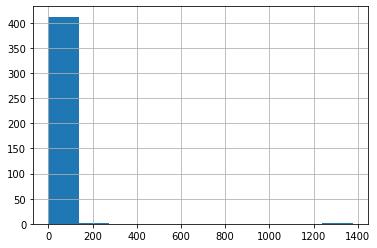

In [31]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count